In [1]:
# General import
import numpy as np
import os
from PIL import Image
from scipy import signal
from scipy import interpolate
import matplotlib.pyplot as plt
%matplotlib inline
# Local import
from Codes.dataprocess import DataGen
from Codes.dataprocess import Export_ep
from Codes.alternate import AlternatingBD
from Codes.display import Display_ker
from Codes.display import Display_im
from Codes.simplex import Simplex
from Codes.fbstep import Energy

# Minimisation alternée

Approche variationnelle pour la reconstruction d'un noyau régulier $K$, minimisation de l'énergie,
$$
E_1(K) = \frac{1}{2} \| g - K * u\|^2 + \frac{1}{2} \alpha \| D K \|^2
\; .
$$ 
On peut considérer que le noyau appartien a l'ensemble des simplexe (ensemble des noyaux à coefficient positif dont la somme vaut 1).
On sonsidere alors l'énergie
$$
E_1'(K) = \frac{1}{2} \| g - K * u\|^2 + \frac{1}{2} \alpha \| D K \|^2 + \Sigma(K)
\; .
$$ 


Approche variationnelle pour la reconstruction de l'image $u$, avec régularisation TV,
$$
E_2(u) = \frac{1}{2} \| g - K * u\|^2 +  \mu \text{TV} (u)
\; .
$$

Dans la minimisation alternée, on considere d'abord la minimisation de $E_2$ 
pour reconstruire l'image $u$, puis de $E_1$ (ou éventuellement $E_1'$) pour reconstruire le noyau $K$.

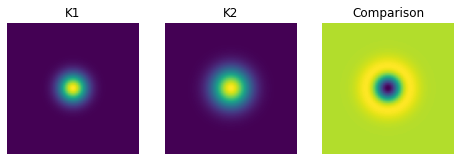

Erreur |K1 - K2|/ |K2| : 0.3500 


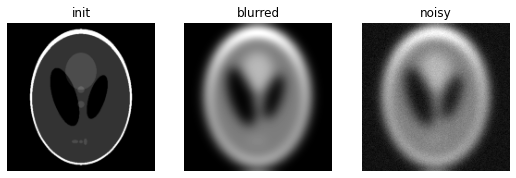

Erreur blurred |x_blurr- x_true|_2 :0.6363
Erreur |x_noisy - x_true|_2 :0.6377


In [2]:
K, K_shift, x_i, x_b, x_o1 = DataGen()

### Initialisation juste - bruit 5%

In [3]:
alpha = 100
mu    = 0.001
K_in  = K.copy()
x_in  = x_o1
x_out,K_out = AlternatingBD(K_in,x_in,x_o1,alpha,mu,\
                  alte=5,niter_TV=2000,niter_Lap=2000,\
                  proj_simplex=True)

------------- min image -----------------


NameError: name 'regK' is not defined

In [ ]:
plt.plot(Etot,'+')
plt.title("Initialisation juste, bruit 0.05")

In [ ]:
Display_ker(K_out,K_in,mysize=(8,4))
Display_im(xd,x_i,mysize=(10,5))

### Initialisation noyau proche - pas de bruit

In [ ]:
alpha = 1
mu    = 5
K_in      = K_shift.copy()
x_in      = x_b
# Kd,xd,Etot = AlternatingBD(K_in,x_in,x_b,alpha,mu,alte=5,\
#                niter_TV=5000,niter_Lap =5000,proj_simplex=False)

In [ ]:
# plt.plot(Etot,'+')
# plt.title("Initialisation proche, pas de bruit")

In [ ]:
# Display_ker(Kd,K,mysize=(8,4))
# Display_im(xd,x_i,mysize=(10,5))

In [ ]:
#Export_ep(Etot,label='1',cas='2')

### Initialisation proche - bruit 1%

In [ ]:
alpha = 1
mu    = 5
K_in      = K_shift.copy()
x_in      = x_o1
Kd,xd,Etot = AlternatingBD(K_in,x_in,x_o1,alpha,mu,alte=5,\
               niter_TV=5000,niter_Lap =5000,proj_simplex=False)

In [ ]:
plt.plot(Etot,'+')
plt.title("Initialisation proche, bruit 0.01")
Export_ep(Etot,label='1',cas='2')

In [ ]:
Display_ker(Kd,K,mysize=(8,4))
Display_im(xd,x_i,mysize=(10,5))

In [ ]:
Export_ep(Etot,label='1',cas='3')

In [ ]:
from Codes.myfunc import convolve
# # local parameters and matrix sizes
M,_    = K.shape
M      = M//2 # kernel middle size
Nx, Ny = x_b.shape # image size
# kernel position (for padding)
min_x  = Nx//2+1-M-2
max_x  = Nx//2+M-1
min_y  = Ny//2+1-M-2
max_y  = Ny//2+M-1
# Initialisation
Kk                          = np.zeros((Nx,Ny))
Kk[min_x:max_x,min_y:max_y] = Kd
Display_im(convolve(xd,Kk),x_o1,mysize=(10,5))

In [ ]:
import sys
sys.exit()

# ANNEXES

### Initialisation proche - bruit 1% - projection sur le simplex

In [ ]:
alpha = 0.1
mu    = 0.05
sigma,moy = 0.15, 0.05
K_in      = np.exp(-( (d-moy)**2 / ( 2.0 * sigma**2 ) ) )
K_in      = K_in/K_in.sum() # Simplex
x_in      = x_b
Kd,xd,Etot = AlternatingBD(K_in,x_in,x_o1,alpha,mu,alte=5,\
               niter_TV=200,niter_Lap =200,proj_simplex=True)

In [ ]:
plt.plot(Etot,'+')
plt.title("Initialisation proche, bruit 0.01, proj sur simplex")

In [ ]:
Display_ker(Kd,K,mysize=(8,4))
Display_im(xd,x_i,mysize=(10,5))

### Initialisation lointaine, bruit 1%, proj sur simplex

In [ ]:
alpha = 0.1
mu    = 0.05
sigma,moy = 0.4, 0.1
K_in      = np.exp(-( (d-moy)**2 / ( 2.0 * sigma**2 ) ) )
K_in      = K_in/K_in.sum() # Simplex
x_in      = x_b
Kd,xd,Etot = AlternatingBD(K_in,x_in,x_o1,alpha,mu,alte=5,\
               niter_TV=200,niter_Lap =200,proj_simplex=True)

In [ ]:
plt.plot(Etot,'+')
plt.title("Initialisation proche, bruit 0.01, proj sur simplex")

In [ ]:
Display_ker(Kd,K,mysize=(8,4))
Display_im(xd,x_i,mysize=(10,5))